# Explore the nature of the recorded waveforms
This notebook explores the nature of the source audio files.

Author: Reece Robinson, 2016

In [5]:
source_directory = r'/Users/reecerobinson/Library/Mobile Documents/com~apple~CloudDocs/Data Sets/Audio Recognition/Washing Machine Completion/example/'

In [6]:
%matplotlib inline
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

In [7]:
x, sr = librosa.load(source_directory+'161225-002-Beeps.wav', sr=None)
print x.shape
print sr

(208600,)
48000


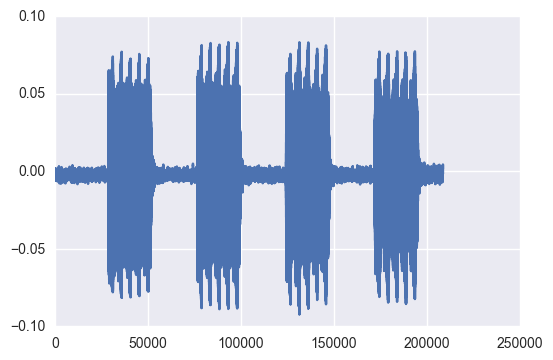

In [8]:
plt.plot(x)
plt.show()

In [9]:
from IPython.display import Audio
Audio(source_directory+'161225-002-Beeps.wav')

In [10]:
x, sr = librosa.load(source_directory+'161225-002-Beep.wav', sr=None)
print x.shape
print sr

(64000,)
48000


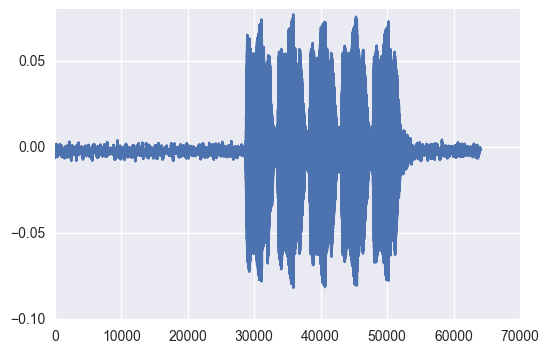

In [11]:
plt.plot(x)
plt.show()

In [12]:
from IPython.display import Audio
Audio(source_directory+'161225-002-Beep.wav')

### Spectogram

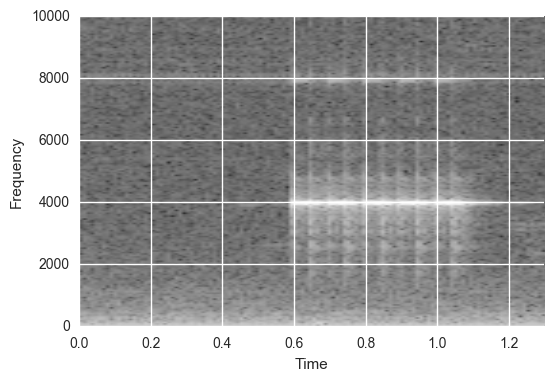

In [13]:
S, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sr, noverlap=512,cmap=plt.cm.gray)
# S, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sr, noverlap=512,cmap=plt.cm.gist_heat)

# Plot a spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0,10000)
plt.xlim(0,1.3)
plt.show()

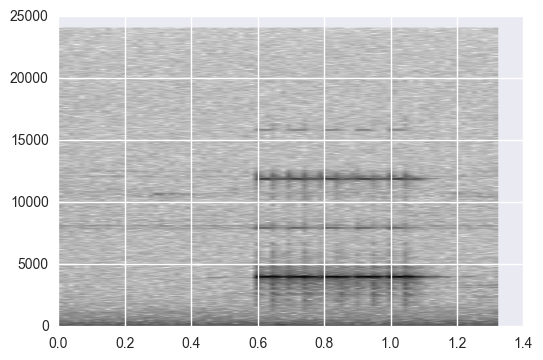

In [14]:
import pylab
Pxx, freqs, t, plot = pylab.specgram(
    x,
    NFFT=1024, 
    Fs=sr, 
    detrend=pylab.detrend_none,
    window=pylab.window_hanning,
    noverlap=int(512 * 0.5))


### Mel spectrogram

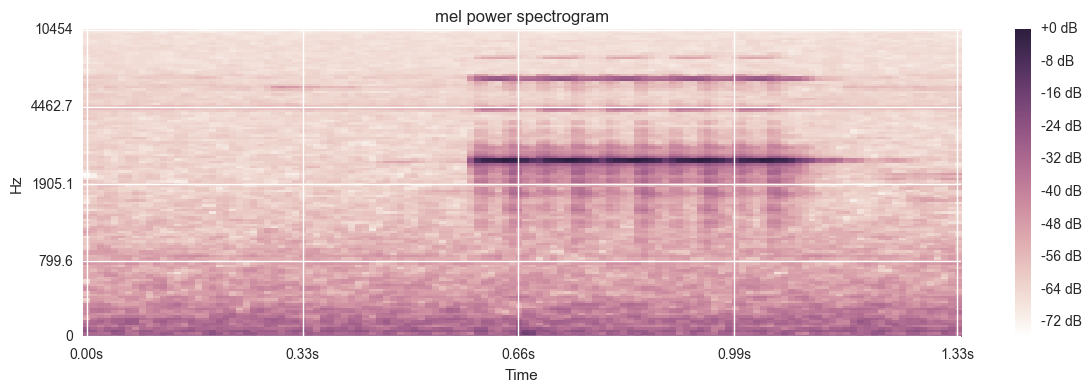

In [15]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()

### Harmonic-percussive source separation

In [16]:
y_harmonic, y_percussive = librosa.effects.hpss(x)

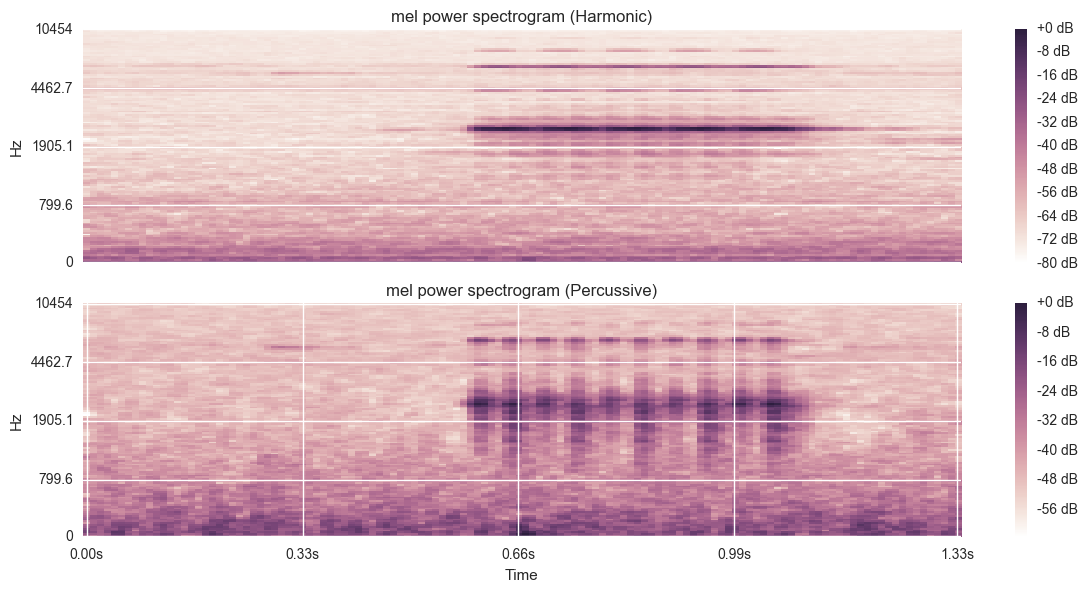

In [17]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()

### Chromagram

/Volumes/ThorsHammer/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return array(a, dtype, copy=False, order=order)


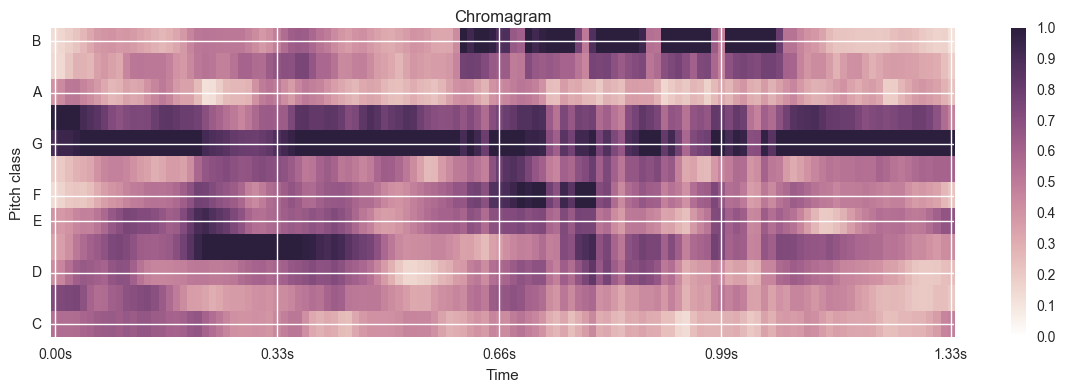

In [18]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()
plt.show()

### MFCC

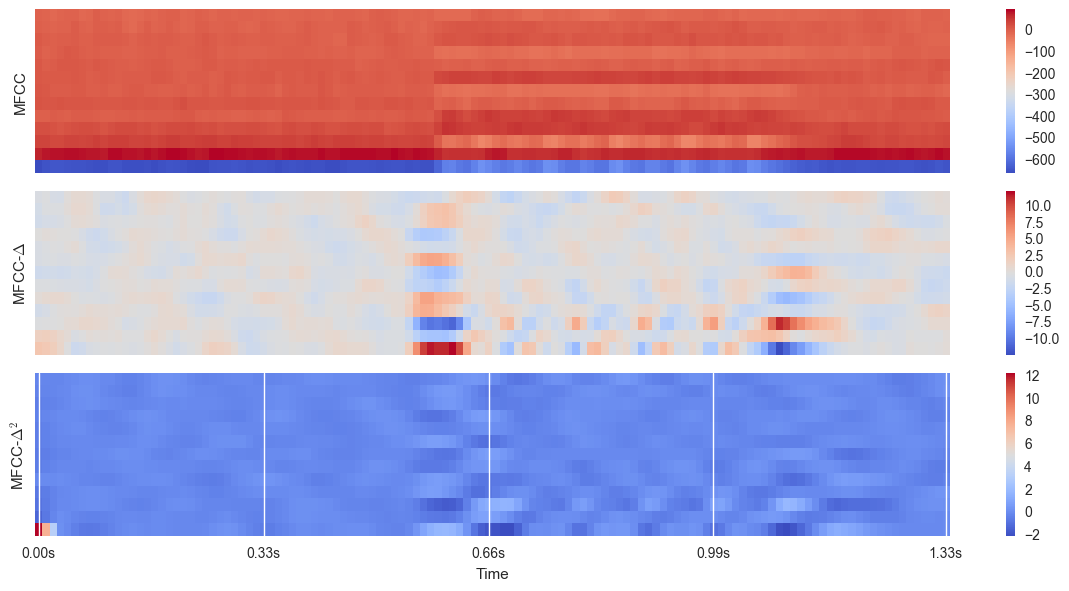

In [19]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()
plt.show()
# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])


### Test Generated Signal Analysis

100000
100000


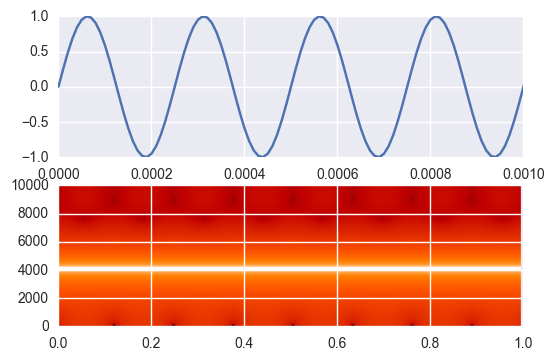

In [20]:
time = np.arange(0,1,0.00001)
data=np.sin(2*np.pi*4000*time) 
print len(time)
print len(data)

NFFT = 1024     # the length of the windowing segments
Fs = 100000  # the sampling rate

# plot signal and spectrogram

ax1 = plt.subplot(211)
plt.plot(time,data)   # for this one has to either undersample or zoom in 
plt.xlim([0,0.001])
plt.subplot(212 )  # don't share the axis
Pxx, freqs, bins, im = plt.specgram(data, NFFT=NFFT, Fs=Fs, noverlap=512, cmap=plt.cm.gist_heat)
plt.ylim(0,10000)
plt.show() 

In [21]:
Audio(data, rate=Fs)